## Logistic Regression for Mushroom Classification

### Part 1 - Data Preprocessing

### Importing the Dataset

In [27]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Load the dataset from a CSV file named 'cleaned_mushroom.csv' into a DataFrame
dataset = pd.read_csv('cleaned_mushroom.csv')

In [28]:
# Display information about the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [29]:
# Display information about the DataFrame
dataset.info

<bound method DataFrame.info of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         0         24           19         14       20    16   
1         1         24           19         25       20     1   
2         1          2           19         23       20    12   
3         0         24           25         23       20    16   
4         1         24           19          7        6    14   
...     ...        ...          ...        ...      ...   ...   
8119      1         11           19         14        6    14   
8120      1         24           19         14        6    14   
8121      1          6           19         14        6    14   
8122      0         11           25         14        6    25   
8123      1         24           19         14        6    14   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   6             3         14          11  ...   
1                   6             3          2       

In [30]:
# Display the first 10 rows of the DataFrame.
dataset.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,24,19,14,20,16,6,3,14,11,...,19,23,23,16,23,15,16,11,19,21
1,1,24,19,25,20,1,6,3,2,11,...,19,23,23,16,23,15,16,14,14,7
2,1,2,19,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,14,13
3,0,24,25,23,20,16,6,3,14,14,...,19,23,23,16,23,15,16,11,19,21
4,1,24,19,7,6,14,6,23,2,11,...,19,23,23,16,23,15,5,14,1,7
5,1,24,25,25,20,1,6,3,2,14,...,19,23,23,16,23,15,16,11,14,7
6,1,2,19,23,20,1,6,3,2,7,...,19,23,23,16,23,15,16,11,14,13
7,1,2,25,23,20,12,6,3,2,14,...,19,23,23,16,23,15,16,14,19,13
8,0,24,25,23,20,16,6,3,14,16,...,19,23,23,16,23,15,16,11,22,7
9,1,2,19,25,20,1,6,3,2,7,...,19,23,23,16,23,15,16,11,19,13


### Getting the Inputs and Outputs

In [31]:
#rows,columns

# Select all rows and all columns except the first to use as features (X).
X = dataset.iloc[:,1:].values

# Select all rows and the first column to use as the target variable (y).
y = dataset.iloc[:,0].values

In [32]:
# Display values for X
X

array([[24, 19, 14, ..., 11, 19, 21],
       [24, 19, 25, ..., 14, 14,  7],
       [ 2, 19, 23, ..., 14, 14, 13],
       ...,
       [ 6, 19, 14, ...,  2,  3, 12],
       [11, 25, 14, ..., 23, 22, 12],
       [24, 19, 14, ..., 15,  3, 12]])

In [33]:
# Display values for y
y

array([0, 1, 1, ..., 1, 0, 1])

### Creating the Training Set and Test Set

In [34]:
# 'train_test_split' is used to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split #library, module, function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Display values for X_train
X_train

array([[11, 19,  7, ..., 23, 19,  7],
       [24,  6, 23, ..., 23, 14,  7],
       [24, 19, 23, ..., 11, 19, 13],
       ...,
       [24, 19,  7, ..., 14, 19,  7],
       [ 6,  6, 14, ..., 14, 22,  4],
       [24, 25,  7, ..., 14, 25,  4]])

In [36]:
# Display values for X_test
X_test

array([[24, 25, 14, ..., 11, 19, 21],
       [ 6, 25,  7, ..., 11, 25,  4],
       [24, 25, 25, ..., 14, 14, 13],
       ...,
       [ 6, 25,  5, ..., 23, 22, 16],
       [ 2, 19, 23, ..., 11, 14, 13],
       [24, 25, 14, ..., 14, 22,  4]])

In [37]:
# Display values for y_train
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# Display values for y_test
y_test

array([0, 1, 1, ..., 0, 1, 1])

### Feature Scaling

In [39]:
# 'StandardScaler' standardizes the features by removing the mean and scaling to unit variance.
# Create an instance of 'StandardScaler' to perform feature scaling.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [40]:
# Display values for X_train
X_train

array([[-0.38289819,  0.17298815, -0.80924263, ...,  1.388346  ,
        -0.15092292, -0.33621997],
       [ 1.08315453, -1.48764697,  1.35067641, ...,  1.388346  ,
        -0.94965915, -0.33621997],
       [ 1.08315453,  0.17298815,  1.35067641, ..., -0.65545278,
        -0.15092292,  0.75125196],
       ...,
       [ 1.08315453,  0.17298815, -0.80924263, ..., -0.14450308,
        -0.15092292, -0.33621997],
       [-0.94676462, -1.48764697,  0.13572195, ..., -0.14450308,
         0.32831881, -0.87995594],
       [ 1.08315453,  0.93943513, -0.80924263, ..., -0.14450308,
         0.80756055, -0.87995594]])

### Part 2 - Building and Training the Model

### Building the Model

In [41]:
# 'LogisticRegression' is used to create and train a logistic regression model for classification tasks.
# Create an instance of the 'LogisticRegression' model.
# 'random_state=0' ensures the results are reproducible by controlling the randomness in the model.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

### Training the Model

In [42]:
# Train (fit) the logistic regression model using the training data.
model.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [43]:
# Scale the test features using the same scaler used for the training data.
y_pred = model.predict(sc.transform(X_test))

In [44]:
# Display values for y_pred
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [45]:
# Display values for y_test
y_test

array([0, 1, 1, ..., 0, 1, 1])

### Making the Prediction of A Single Data Point with:

1. Cap-Shape 24
2. Cap-Surface 19
3. Cap-Color 14
4. Bruises 20
5. Odor 16
6. Gill-Attachment 6
7. Gill-Spacing 3
8. Gill-Size 14
9. Gill-Color 11
10. Stalk-Shape 5
11. Stalk-Root 5
12. Stalk-Surface-Above-Ring 19
13. Stalk-Surface-Below-Ring 19
14. Stalk-Color-Above-Ring 23
15. Stalk-Color-Below-Ring 23
16. Veil-Type 16
17. Veil-Color 23
18. Ring-Number 15
19. Ring-Type 16
20. Spore-Print-Color 11
21. Population 19
22. Habitat 21

In [46]:
# Making the Prediction of A Single Data Point (Row 0)
model.predict(sc.transform([[24,19,14,20,16,6,3,14,11,5,5,19,19,23,23,16,23,15,16,11,19,21]]))

array([0])

In [47]:
# Making the Prediction of A Single Data Point (Row 8124)
model.predict(sc.transform([[24,19,14,6,14,1,3,2,25,5,2,19,19,15,15,16,15,15,16,15,3,21]]))

array([1])

## Part 3. Evaluating the Model

### Confusion Matrix

In [48]:
# This function computes the confusion matrix, which is used to evaluate the performance of a classification model.
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred)


array([[742,  31],
       [ 34, 818]])

### Accuracy

In [49]:
# Manual computation of Accuracy
(742+818)/(742+818+34+31)


0.96

In [50]:
# This function computes the accuracy of a classification model by comparing the actual labels with the predicted labels.
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_pred)

0.96

### Visualization 

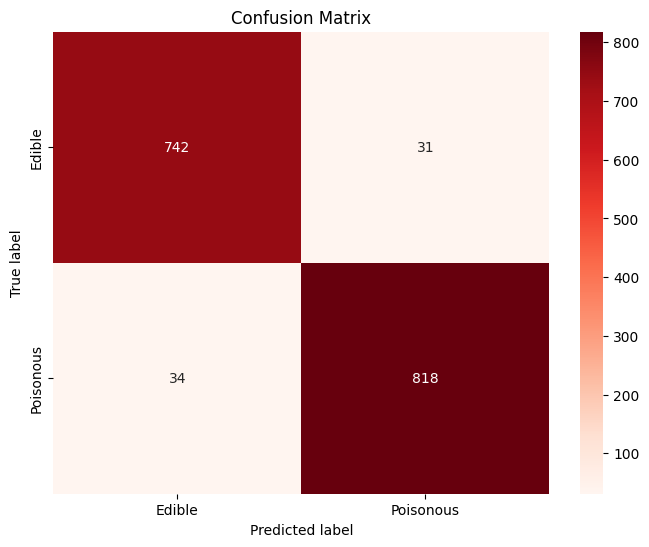

In [51]:
# Import the necessary libraries for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])

# Labeling the axes and title
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()